# Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


# Preprocessing

In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df['area_type'].nunique()

4

In [6]:
df['society'].nunique()

2688

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df['size'].nunique()

31

In [9]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Handling missing values

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df.shape

(13320, 9)

In [12]:
df.drop(['society'],axis=1,inplace=True)
df.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [13]:
df.shape

(13320, 8)

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [16]:
df.shape

(12710, 8)

In [17]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [18]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [19]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
df.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [21]:
df[df['bhk'] > 20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [22]:
df = df[df['bhk'] < 20]

In [23]:
df.shape

(12708, 9)

In [24]:
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


## Feature engineering

In [25]:
df.describe()

,bath,balcony,price,bhk
count,12708.000000,12708.000000,12708.000000,12708.000000
mean,2.612449,1.584592,106.007435,2.732059
std,1.160399,0.817110,131.680200,1.130734
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,49.015000,2.000000
50%,2.000000,2.000000,70.000000,3.000000
75%,3.000000,2.000000,115.000000,3.000000
max,15.000000,3.000000,2912.000000,14.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12708 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12708 non-null  object 
 1   availability  12708 non-null  object 
 2   location      12708 non-null  object 
 3   size          12708 non-null  object 
 4   total_sqft    12708 non-null  object 
 5   bath          12708 non-null  float64
 6   balcony       12708 non-null  float64
 7   price         12708 non-null  float64
 8   bhk           12708 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 992.8+ KB


In [27]:
# Define a function to perform the above mentioned job.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
      return None

In [28]:
df = df.copy()
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [29]:
df['price_per_sqft'] = (df['price']*100000 / df['total_sqft'])

In [30]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft        42
bath               0
balcony            0
price              0
bhk                0
price_per_sqft    42
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(12666, 10)

In [33]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [34]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [35]:
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield            513
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        259
Thanisandra           230
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: count, Length: 1258, dtype: int64

In [36]:
location_stats.values.sum()

12666

In [37]:
# Locations with more than 10 rows
len(location_stats[location_stats>50])

49

In [38]:
df['location'].nunique()

1258

In [39]:
df.shape

(12666, 10)

In [40]:
location_stats_less_than_50 = location_stats[location_stats<=50]
location_stats_less_than_50

location
Jalahalli             50
HSR Layout            49
Bhoganhalli           48
Gottigere             48
Mysore Road           48
                      ..
Milk Colony            1
Sundara Nagar          1
Jaladarsini Layout     1
Madanayakahalli        1
Abshot Layout          1
Name: count, Length: 1209, dtype: int64

In [41]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_50 else x)
len(df.location.unique())

50

In [42]:
df['location'].nunique()

50

In [43]:
df.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,other,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,other,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


## Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [44]:
df[df.total_sqft/df.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Ready To Move,other,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,other,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [45]:
df.shape

(12666, 10)

In [46]:
df = df[df.total_sqft/df.bhk>300]

In [47]:
df.shape

(11847, 10)

**Outlier Removal Using Standard Deviation and Mean**

In [48]:
df.price_per_sqft.describe()

count     11847.000000
mean       6122.582987
std        3895.257533
min         267.829813
25%        4187.716982
50%        5227.272727
75%        6750.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [49]:
# function for removing outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10213, 10)

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

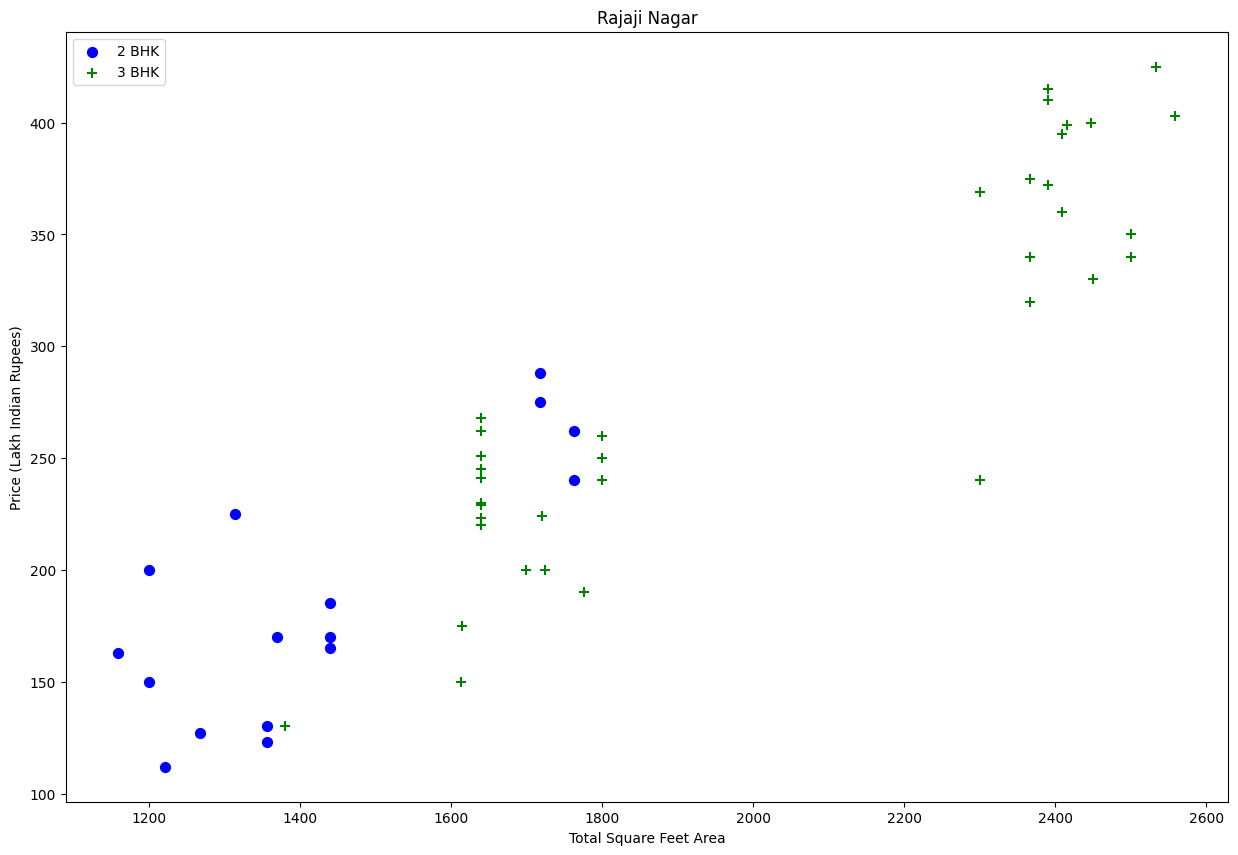

In [51]:
# for Rajai nagar
plot_scatter_chart(df,"Rajaji Nagar")

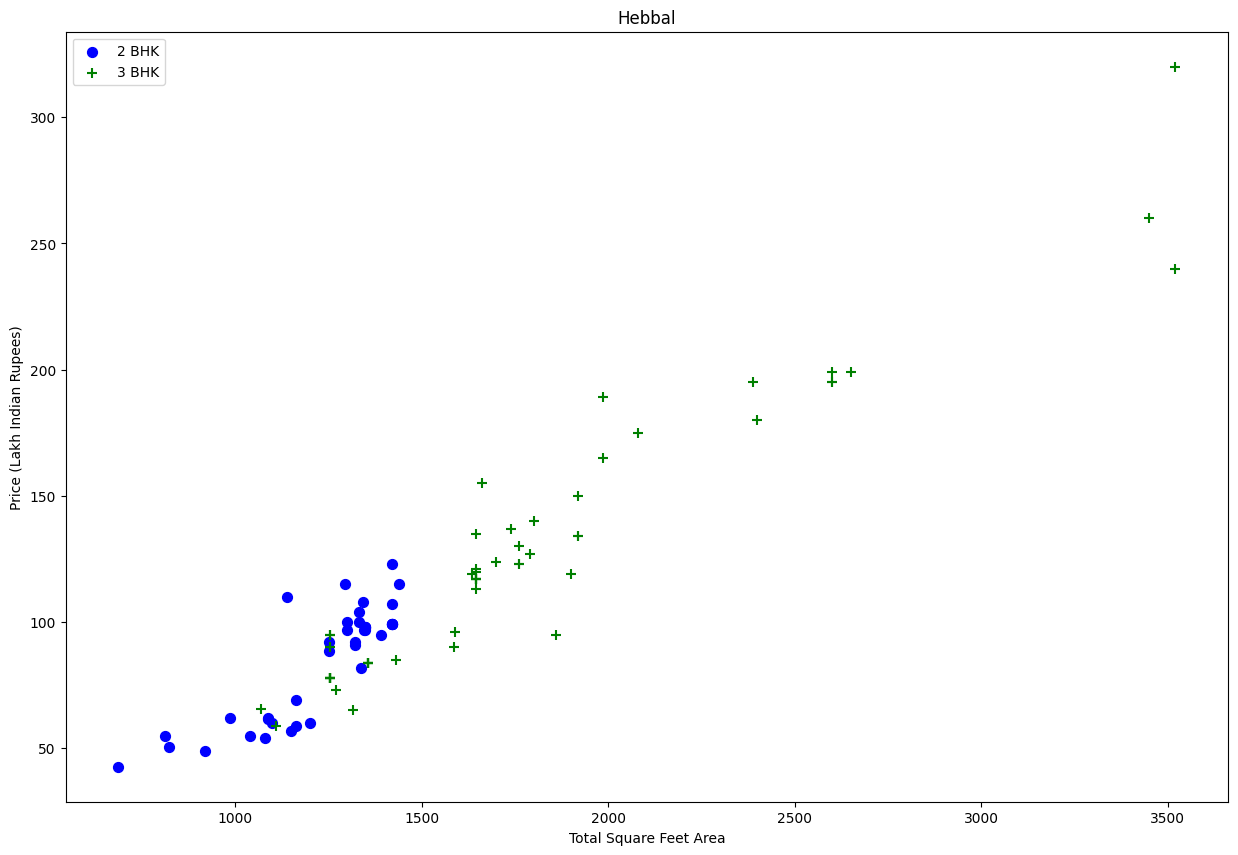

In [52]:
# for hebbal
plot_scatter_chart(df,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.


{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },

    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },  
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [53]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [54]:
df = remove_bhk_outliers(df)
df.shape

(6124, 10)

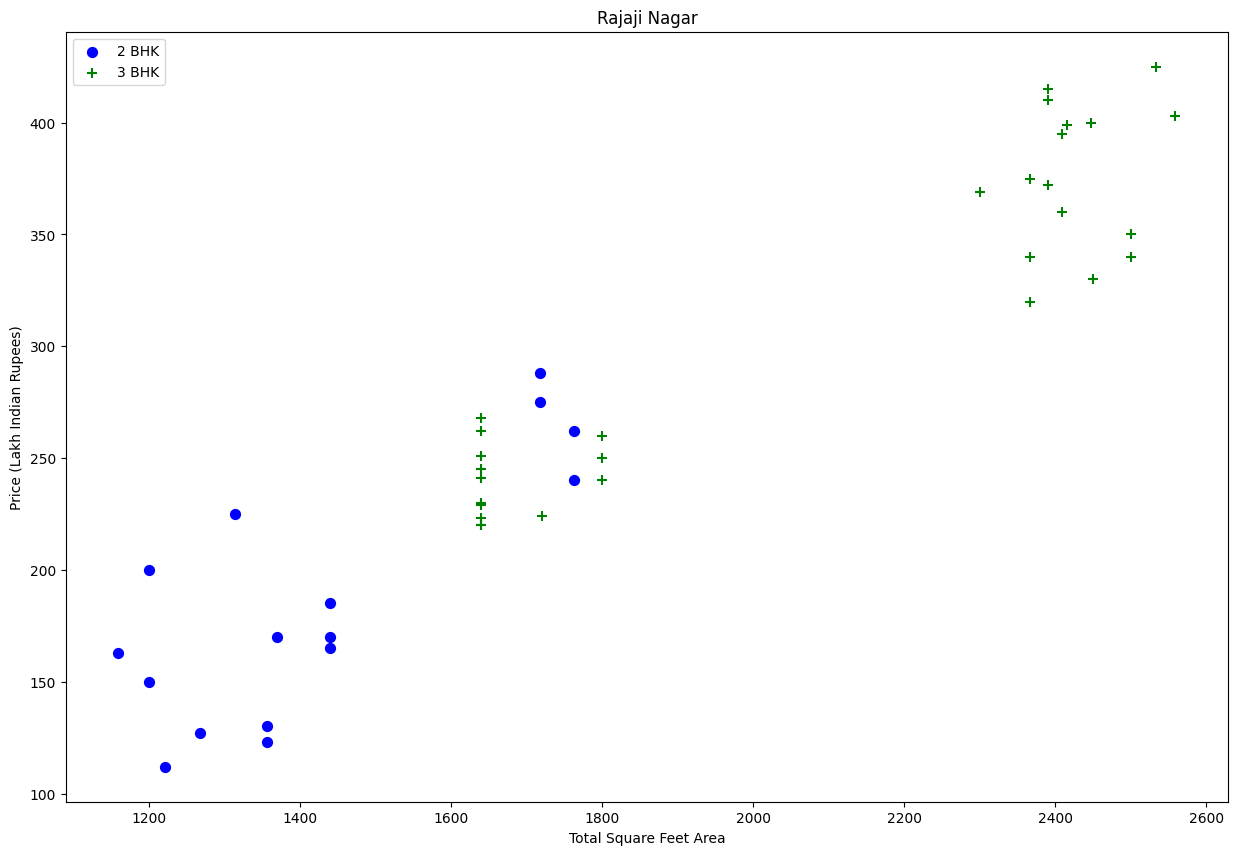

In [55]:
# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df,"Rajaji Nagar")

We can see that we have removed a lot of outliers

Text(0, 0.5, 'Count')

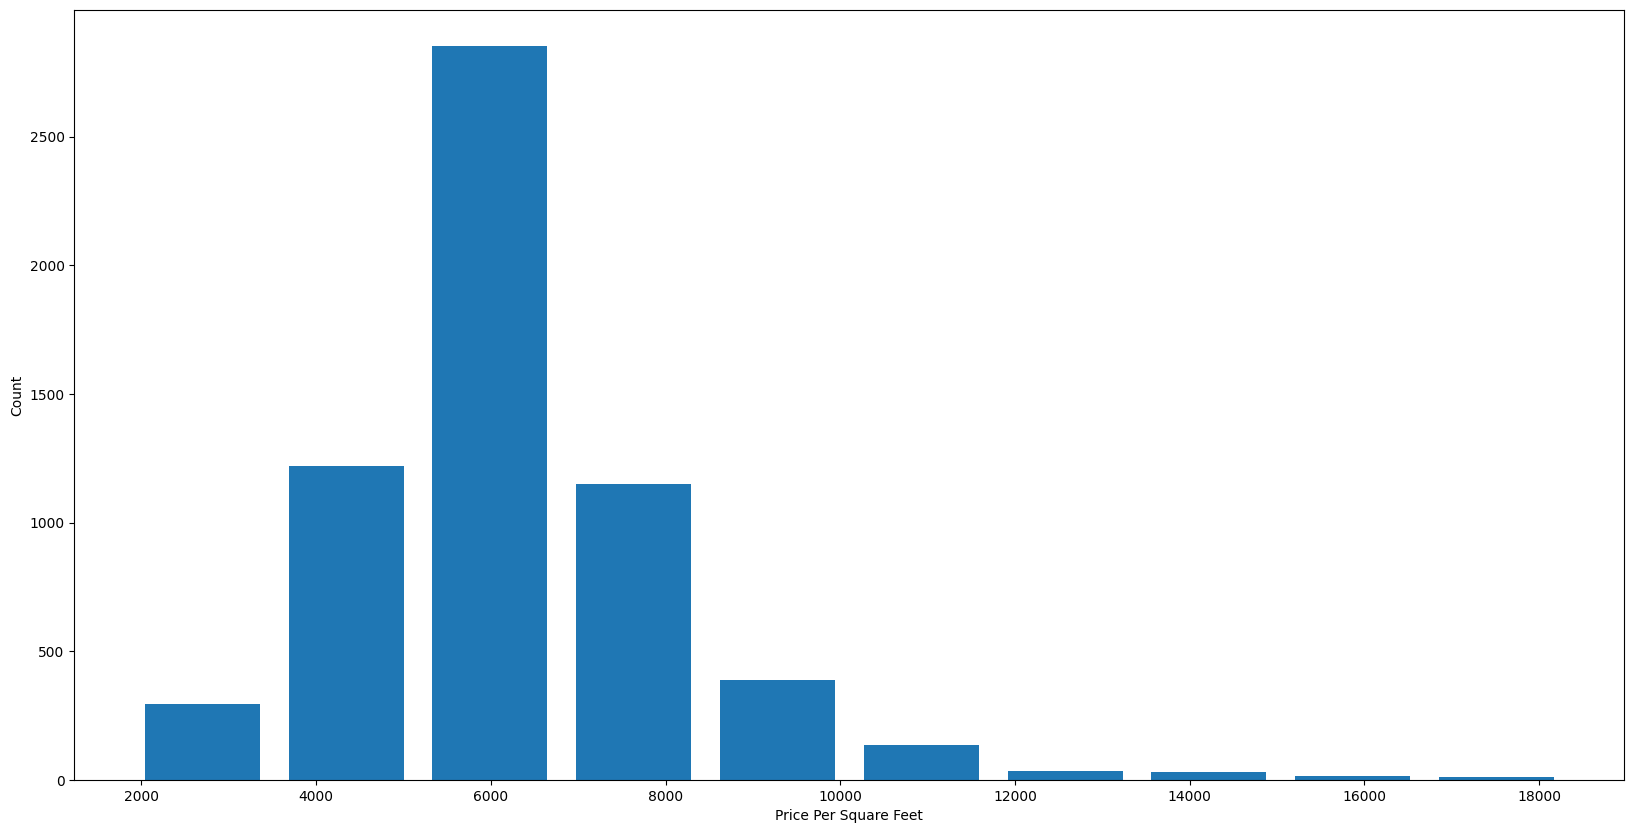

In [56]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Outlier Removal Using Bathrooms Feature**

In [57]:
df.bath.unique()

array([ 2.,  3.,  4.,  1.,  5.,  6.,  9.,  7.,  8., 13., 10.])

Text(0, 0.5, 'Count')

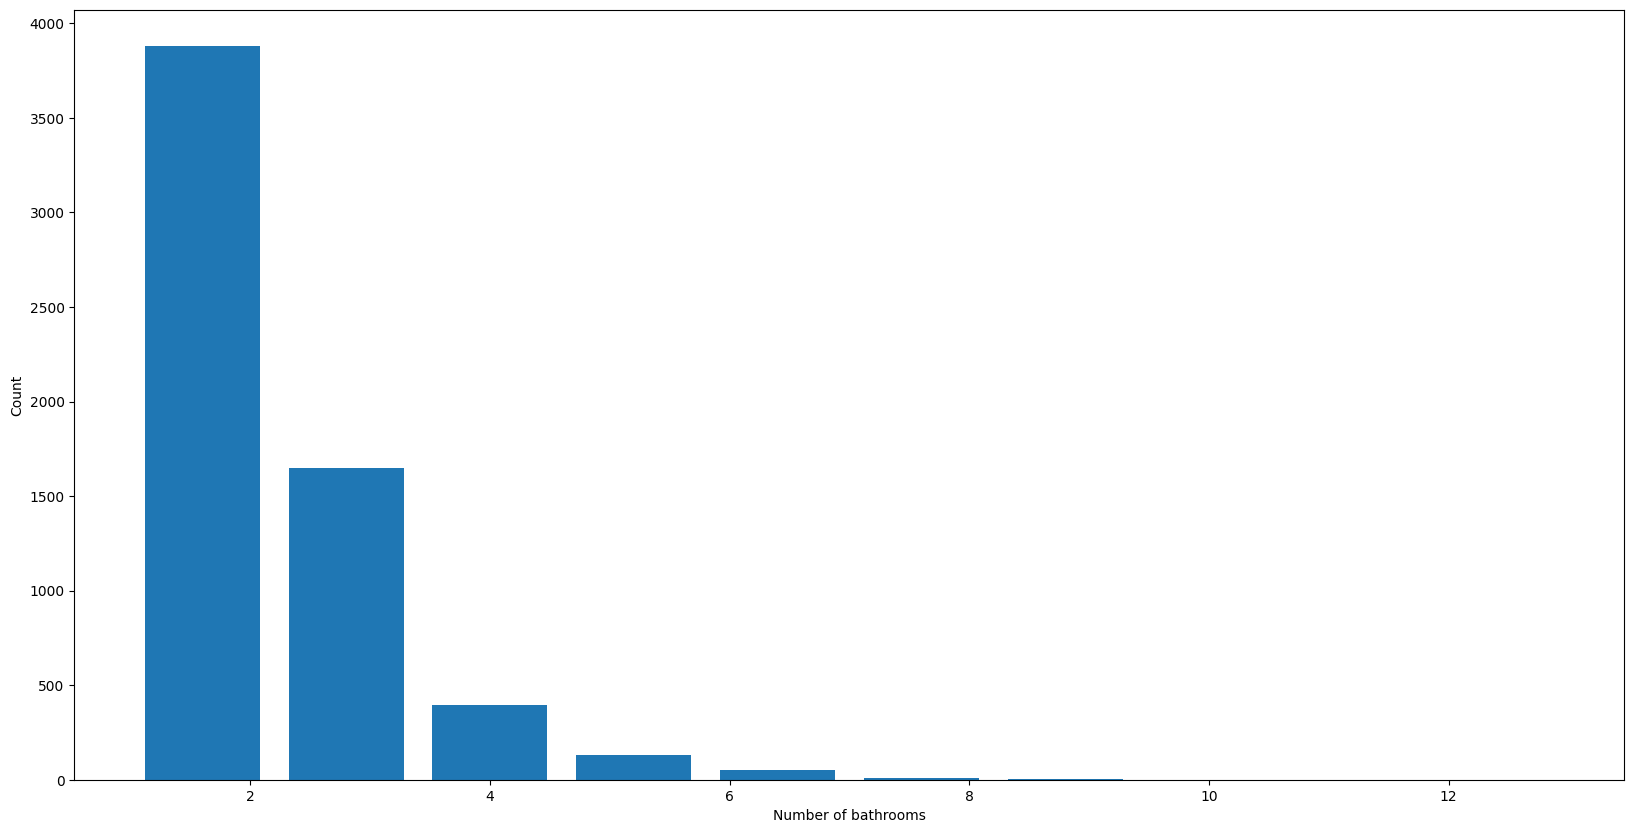

In [58]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [59]:
# Some houses have 13 bathrooms.Lets look more into it
df[df.bath>7].count()

area_type         8
availability      8
location          8
size              8
total_sqft        8
bath              8
balcony           8
price             8
bhk               8
price_per_sqft    8
dtype: int64

In [60]:
df.shape

(6124, 10)

In [61]:
df = df[df.bath<8]

In [62]:
df.shape

(6116, 10)

Looks fine to have 13 bathrooms for 13bhk house. But if you have, say, 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed. So we need to consider that too while doing outlier detection.

In [63]:
df[df.bath>df.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3468,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.03433


In [64]:
df.shape

(6116, 10)

In [65]:
df = df[df.bath<df.bhk+2]
df.shape

(6065, 10)

In [66]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1080.0,2.0,2.0,72.0,2,6666.666667
1,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1270.0,2.0,2.0,93.0,2,7322.834646
2,Built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,1420.0,2.0,1.0,100.0,3,7042.253521
3,Built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,1850.0,3.0,1.0,150.0,3,8108.108108
4,Built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1245.0,2.0,1.0,94.0,2,7550.200803


In [67]:
df.nunique()

area_type            4
availability        68
location            50
size                15
total_sqft        1403
bath                 7
balcony              4
price             1045
bhk                  7
price_per_sqft    3957
dtype: int64

In [68]:
df = df[['area_type','location','total_sqft','bath','balcony','bhk','price']]
df

,area_type,location,total_sqft,bath,balcony,bhk,price
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2,72.0
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2,93.0
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3,100.0
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,3,150.0
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,2,94.0
...,...,...,...,...,...,...,...
10207,Super built-up Area,other,1015.0,2.0,2.0,2,60.0
10209,Built-up Area,other,1805.0,3.0,3.0,3,134.0
10210,Super built-up Area,other,1715.0,3.0,3.0,3,112.0
10211,Super built-up Area,other,4689.0,4.0,1.0,4,488.0


In [69]:
df.head(3)

,area_type,location,total_sqft,bath,balcony,bhk,price
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2,72.0
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2,93.0
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3,100.0


In [70]:
x = df.drop(columns=['price'])
y = np.log(df['price'])

In [71]:
x

,area_type,location,total_sqft,bath,balcony,bhk
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,3
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,2
...,...,...,...,...,...,...
10207,Super built-up Area,other,1015.0,2.0,2.0,2
10209,Built-up Area,other,1805.0,3.0,3.0,3
10210,Super built-up Area,other,1715.0,3.0,3.0,3
10211,Super built-up Area,other,4689.0,4.0,1.0,4


In [72]:
y

0        4.276666
1        4.532599
2        4.605170
3        5.010635
4        4.543295
           ...   
10207    4.094345
10209    4.897840
10210    4.718499
10211    6.190315
10212    2.833213
Name: price, Length: 6065, dtype: float64

In [73]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear regression

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8207169015252118
MAE 0.1763687148299851


### Ridge Regression

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8152196122015763
MAE 0.18156509598705436


### Lasso Regression

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8069557251149082
MAE 0.18926318096694347


### KNN

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8439068624964057
MAE 0.175195254796457


### Decision Tree

In [80]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8641736982171961
MAE 0.16932401692681806


### SVM

In [81]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8713976785564845
MAE 0.16368507021073733


### Random Forest

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8966699949204927
MAE 0.14509382712888322


### ExtraTrees

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                            #   max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8896690632621821
MAE 0.14807754069250453


### AdaBoost

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8076339633386085
MAE 0.20227452564858725


### Gradient Boost

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9125770527918491
MAE 0.1361765520184322


### XgBoost

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9084419321279921
MAE 0.1368379244438851


### Voting Regressor

In [87]:
from sklearn.ensemble import VotingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9000268775343911
MAE 0.14579892197433691


### Stacking

In [88]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5))
    # ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9001154646824155
MAE 0.1467798344459471


In [89]:
df.head(10)

,area_type,location,total_sqft,bath,balcony,bhk,price
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2,72.0
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2,93.0
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3,100.0
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,3,150.0
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,2,94.0
5,Super built-up Area,7th Phase JP Nagar,1175.0,2.0,1.0,2,82.0
6,Super built-up Area,7th Phase JP Nagar,1400.0,2.0,1.0,3,95.0
7,Super built-up Area,7th Phase JP Nagar,2225.0,3.0,1.0,3,160.0
8,Built-up Area,7th Phase JP Nagar,1050.0,2.0,1.0,2,71.0
9,Super built-up Area,7th Phase JP Nagar,1100.0,2.0,0.0,2,46.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6065 entries, 0 to 10212
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   6065 non-null   object 
 1   location    6065 non-null   object 
 2   total_sqft  6065 non-null   float64
 3   bath        6065 non-null   float64
 4   balcony     6065 non-null   float64
 5   bhk         6065 non-null   int64  
 6   price       6065 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 379.1+ KB


In [91]:
df

,area_type,location,total_sqft,bath,balcony,bhk,price
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2,72.0
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2,93.0
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3,100.0
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,3,150.0
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,2,94.0
...,...,...,...,...,...,...,...
10207,Super built-up Area,other,1015.0,2.0,2.0,2,60.0
10209,Built-up Area,other,1805.0,3.0,3.0,3,134.0
10210,Super built-up Area,other,1715.0,3.0,3.0,3,112.0
10211,Super built-up Area,other,4689.0,4.0,1.0,4,488.0


In [92]:
# create a pickle file
import pickle
pickle.dump(df,open('models/df.pkl','wb'))

In [93]:
pickle.dump(pipe,open('models/pipe.pkl','wb'))